In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
#load the dataset
os.chdir('your/path')
df = pd.read_excel('AB TEST.xlsx')

In [3]:
#check the data
df.head()

,group,action
0,experiment,view
1,control,view
2,control,view and click
3,control,view and click
4,control,view


In [4]:
#dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   3757 non-null   object
 1   action  3757 non-null   object
dtypes: object(2)
memory usage: 58.8+ KB


In [5]:
#check the 2 groups counts
df['group'].value_counts()

experiment    1881
control       1876
Name: group, dtype: int64

In [6]:
#check the action counts
df['action'].value_counts()

view              3082
view and click     675
Name: action, dtype: int64

In [7]:
#Control group CTR (Click through rate)
control_df = df.query('group=="control"')
control_ctr = control_df.query('action=="view and click"').index.nunique()/control_df.index.nunique()
control_ctr

0.19349680170575692

In [8]:
#Experiment group CTR (Click through rate)
experiment_df = df.query('group=="experiment"')
experiment_ctr = experiment_df.query('action=="view and click"').index.nunique()/control_df.index.nunique()
experiment_ctr

0.16631130063965885

In [9]:
#Compute the difference in CTR 
diff = experiment_ctr - control_ctr
diff

-0.027185501066098072

In [11]:
#Bootsrapping
differences = []
size = df.shape[0]
for i in range(10000):
    sample = df.sample(size,replace=True)
    control_df = sample.query('group=="control"')
    experiment_df = sample.query('group=="experiment"')
    control_ctr = control_df.query('action=="view and click"').index.nunique()/control_df.index.nunique()
    experiment_ctr = experiment_df.query('action=="view and click"').index.nunique()/control_df.index.nunique()
    differences.append(experiment_ctr-control_ctr)

(array([   9.,  126.,  663., 1938., 2929., 2608., 1254.,  406.,   59.,
           8.]),
 array([-0.06514382, -0.05717893, -0.04921404, -0.04124914, -0.03328425,
        -0.02531935, -0.01735446, -0.00938956, -0.00142467,  0.00654023,
         0.01450512]),
 <BarContainer object of 10 artists>)

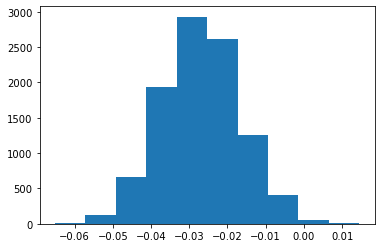

In [12]:
# Plot the sampling distribution 
differences = np.array(differences)
plt.hist(differences)

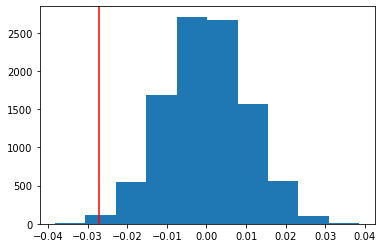

In [13]:
#Simulate the distribution under the null hypothesis 

null_hypothesis = np.random.normal(0,differences.std(), differences.size) 
plt.hist(null_hypothesis)
plt.axvline(diff, c="r")

In [14]:
# Compute the  P-value 
(null_hypothesis > diff).mean()

0.9961